# Dimensionality reduction

This is an implementation of dimensionality reduction using a color image that has been transformed to gray levels and binarized.

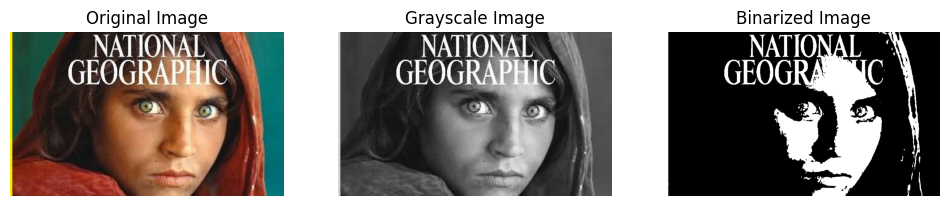

In [4]:
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt

def grayscale_image(image_path):
    try:
        img = Image.open(image_path)
        # Get image dimensions
        width, height = img.size
        # Create a new image with the same dimensions
        gray_img = Image.new("L", (width, height))
        # Iterate through each pixel
        for x in range(width):
            for y in range(height):
                # Get RGB values
                r, g, b = img.getpixel((x, y))[:3]  # Handle potential alpha channel
                # Calculate luminance (grayscale)
                gray = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
                # Set the grayscale value in the new image
                gray_img.putpixel((x, y), gray)
        return gray_img
    except FileNotFoundError:
        print("Image not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def binarize_image_no_lib(image_path, threshold=128):
    try:
        gray_img = grayscale_image(image_path)
        if gray_img is None:
            return None

        width, height = gray_img.size
        binary_img = Image.new("L", (width, height))

        for x in range(width):
            for y in range(height):
                gray = gray_img.getpixel((x,y))
                binary_img.putpixel((x, y), 255 if gray > threshold else 0)

        return binary_img

    except FileNotFoundError:
        print("Image not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


# Example usage (replace with your desired image URL)
image_url = "https://ogimg.infoglobo.com.br/in/20359046-ba5-094/FT1086A/a4.jpg"

try:
    image_response = requests.get(image_url, stream=True)
    image_response.raise_for_status()

    image = Image.open(image_response.raw)
    image.save("temp_image.jpg")

    gray_image = grayscale_image("temp_image.jpg")
    binarized_image = binarize_image_no_lib("temp_image.jpg")

    if binarized_image and gray_image:
        display_images(image, gray_image, binarized_image)

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
except Exception as e:
    print(f"An error occurred: {e}")